# LINEAR TIME INVARIANT SYSTEMS

# Preliminaries

In [1]:
import controlSBML as ctl
import control
from controlSBML.util import makeSimulationTimes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import tellurium as te
print("controlSBML version: " + ctl.__version__)

controlSBML version: 1.0.5


# Models

## Linear model

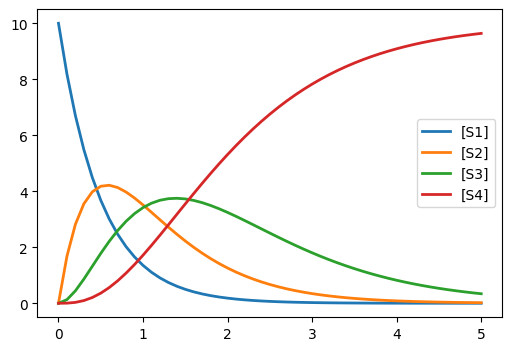

In [2]:
LINEAR_MDL = """
S1 -> S2; k1*S1
S2 -> S3; k2*S2
S3 -> S4; k3*S3

k1 = 2
k2 = 1.5
k3 = 1
S1 = 10
S2 = 0
S3 = 0
S4 = 0
"""
LINEAR_RR = te.loada(LINEAR_MDL)
LINEAR_DATA = LINEAR_RR.simulate()
LINEAR_DF = ctl.Timeseries(LINEAR_DATA, columns=LINEAR_DATA.colnames)
LINEAR_RR.plot(LINEAR_DATA)
LINEAR_STATE_NAMES = ["S1", "S2", "S3", "S4"]
LINEAR_PARAM_DCT = {"input_names": LINEAR_STATE_NAMES, "output_names": LINEAR_STATE_NAMES}

In [3]:
help(ctl.Timeseries)

Help on class Timeseries in module controlSBML.timeseries:

class Timeseries(pandas.core.frame.DataFrame)
 |  Timeseries(mat, times=None, columns=None)
 |  
 |  Method resolution order:
 |      Timeseries
 |      pandas.core.frame.DataFrame
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.indexing.IndexingMixin
 |      pandas.core.arraylike.OpsMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |      Return a Timeseries object.
 |      
 |      Parameters
 |      ----------
 |      key: column of Timeseries
 |      
 |      Returns
 |      -------
 |      Timeseries
 |  
 |  __init__(self, mat, times=None, columns=None)
 |      Parameters
 |      ----------
 |      mat: DataFrame, numpy.darray, NamedArray
 |      times: list-float (time in seconds)
 |      columns: list-str
 |      
 |      Notes:
 |          1. Assigning a value to times overrides an exist

## WOLF model

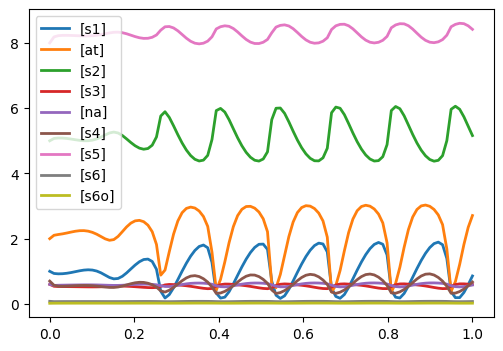

In [4]:
WOLF_CTLSB = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml", 
                        input_names=["at"], output_names=["s5"])
WOLF_RR = WOLF_CTLSB.roadrunner
WOLF_RR.simulate(0, 1, 100)
WOLF_RR.plot()

# LTI Basics

In [5]:
tf = control.TransferFunction([1], np.repeat(1, 4))
tf

TransferFunction(array([1]), array([1, 1, 1, 1]))

In [6]:
tf.poles()

array([-1.00000000e+00+0.j, -3.04846633e-16+1.j, -3.04846633e-16-1.j])

/Users/jlheller/home/Technical/repos/controlSBML/ctl/lib/python3.9/site-packages/control/timeresp.py:941: UserWarning:

Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.



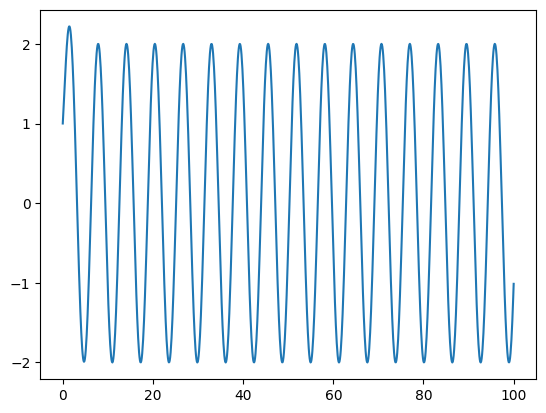

In [7]:
times = np.linspace(0, 100, 1000)
uv = np.repeat(0, len(times))
uv[0] = 1
_, yv = control.forced_response(tf, T=times, X0=1)
plt.plot(times, yv)

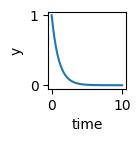

In [28]:
def plotSignal(coefs, x0=1, end_time=100, points_per_time=10, ax=None):
    """
    Plots the signal for the given coefficients.
    """
    tf = control.TransferFunction([1], coefs)
    times = np.linspace(0, end_time, points_per_time*end_time)
    _, yv = control.forced_response(tf, T=times, X0=x0)
    # Plot
    if ax is None:
        _, ax = plt.subplots(1, figsize=(1,1))
    ax.plot(times, yv)
    ax.set_xlabel("time")
    ax.set_ylabel("y")
    #ax.set_title("coefs: %s" % str(coefs))
    return times, yv
    
# Tests
times, yv = plotSignal(np.repeat(1, 2), end_time=10)

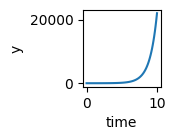

In [29]:
_ = plotSignal([1, -1], end_time=10)

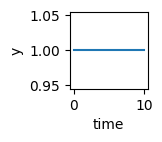

In [30]:
_ = plotSignal([1, 0], end_time=10)

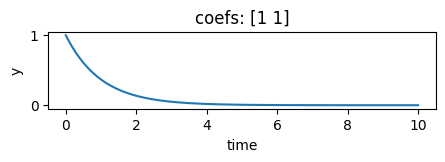

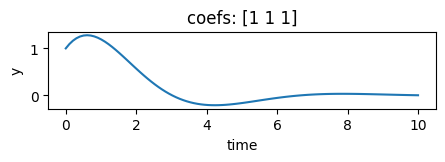

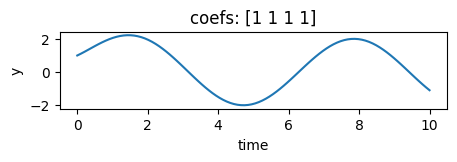

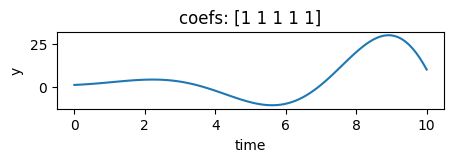

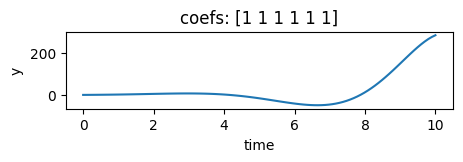

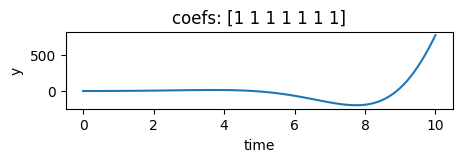

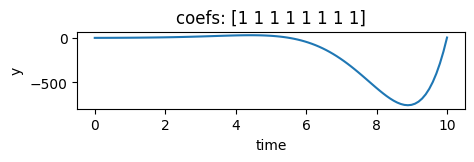

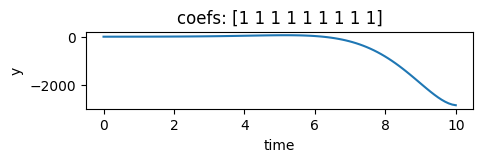

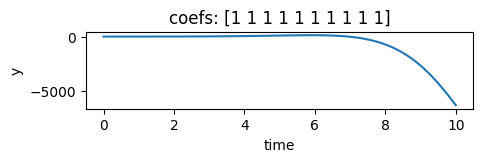

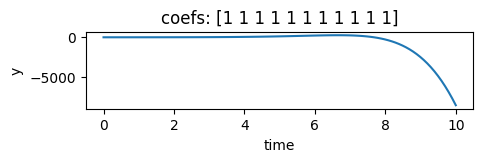

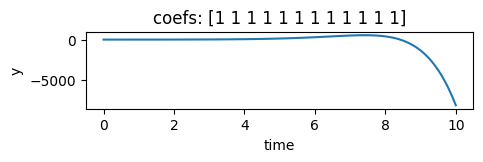

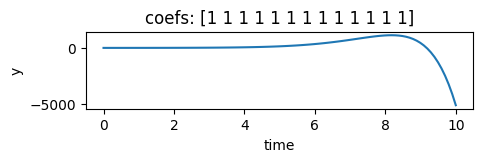

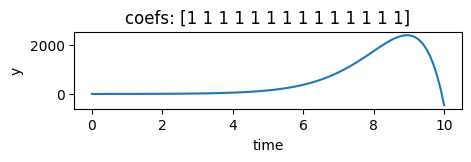

In [19]:
for coefs in [np.repeat(1, n) for n in range(2, 15)]:
    _ = plotSignal(coefs, end_time=10)

# Approximations with linear differential equations

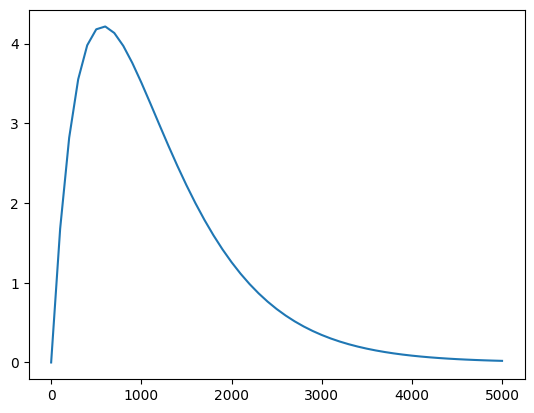

In [9]:
plt.plot(LINEAR_DF.index, LINEAR_DF["S2"])

In [10]:
tf

TransferFunction(array([1]), array([1, 1, 1, 1]))